In [159]:
import pandas as pd 

In [160]:
# Read all datasets
df2 = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\projects\inovpost\ff\dataset2.csv")[['profileName','text']]
df3 = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\projects\inovpost\ff\dataset3.csv")[['profileName','text']]
df4 = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\projects\inovpost\ff\dataset4.csv")[['profileName','text']]

# Concatenate all dataframes
df = pd.concat([df2, df3, df4], ignore_index=True)

# Display the result
print("Shape of combined dataset:", df.shape)
df
# OR Method 2: Using only the columns you want to keep
df = df[['profileName','text']]
df

Shape of combined dataset: (277, 2)


,profileName,text
0,Ocean's Albatros,كون يزيدو خدمة سونلغاز تجي هايلة
1,Latreche Ahmed,صراحة البطاقة لا تلبي أهتمامات وأنشغالات التي ...
2,علي الليث,التحويل \nدفع فاتورات النت والبيس الفليكسي\nوا...
3,Ram Rom,ما شاء الله بريدي موب والله تسهيلات ونقص المشق...
4,Amine Elbaz Hicham Azanova,بالنسبة لتطبيق eccp لا يعمل رغم تحديث ووووو وت...
...,...,...
272,Akef Abadi,في وقت البريد الإلكتروني والذكاء الاصطناعي تطر...
273,المنظمة العالمية لمكافحة الفساد فرع الجزائر,لدينا طلب مضى عليه تقريبا سنة على مستوى مركز ا...
274,Oussalah Mohand Arab,1530 ne repond jamais
275,تنمية مستدامة,فرع ام القراد ببلدية سلمانةولايةمسعدالمنتدبة ...


In [161]:
import re


def clean_text(text):
    """Clean text while preserving both Arabic and French characters"""
    if pd.isna(text):
        return ""
    
    # Convert to string if not already
    text = str(text)
    
    # Remove links
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove special characters but keep Arabic and French characters
    # Arabic: \u0600-\u06FF
    # French: a-zA-ZàâäéèêëîïôöùûüçÀÂÄÉÈÊËÎÏÔÖÙÛÜÇ
    text = re.sub(r'[^\u0600-\u06FFa-zA-ZàâäéèêëîïôöùûüçÀÂÄÉÈÊËÎÏÔÖÙÛÜÇ\s]', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Create a new column with cleaned comments
df['cleaned_comment'] = df['text'].apply(clean_text)

# Display some cleaned comments to verify
df[['text', 'cleaned_comment']].head()

,text,cleaned_comment
0,كون يزيدو خدمة سونلغاز تجي هايلة,كون يزيدو خدمة سونلغاز تجي هايلة
1,صراحة البطاقة لا تلبي أهتمامات وأنشغالات التي ...,صراحة البطاقة لا تلبي أهتمامات وأنشغالات التي ...
2,التحويل \nدفع فاتورات النت والبيس الفليكسي\nوا...,التحويل دفع فاتورات النت والبيس الفليكسي وارجو...
3,ما شاء الله بريدي موب والله تسهيلات ونقص المشق...,ما شاء الله بريدي موب والله تسهيلات ونقص المشق...
4,بالنسبة لتطبيق eccp لا يعمل رغم تحديث ووووو وت...,بالنسبة لتطبيق eccp لا يعمل رغم تحديث ووووو وت...


In [162]:
df

,profileName,text,cleaned_comment
0,Ocean's Albatros,كون يزيدو خدمة سونلغاز تجي هايلة,كون يزيدو خدمة سونلغاز تجي هايلة
1,Latreche Ahmed,صراحة البطاقة لا تلبي أهتمامات وأنشغالات التي ...,صراحة البطاقة لا تلبي أهتمامات وأنشغالات التي ...
2,علي الليث,التحويل \nدفع فاتورات النت والبيس الفليكسي\nوا...,التحويل دفع فاتورات النت والبيس الفليكسي وارجو...
3,Ram Rom,ما شاء الله بريدي موب والله تسهيلات ونقص المشق...,ما شاء الله بريدي موب والله تسهيلات ونقص المشق...
4,Amine Elbaz Hicham Azanova,بالنسبة لتطبيق eccp لا يعمل رغم تحديث ووووو وت...,بالنسبة لتطبيق eccp لا يعمل رغم تحديث ووووو وت...
...,...,...,...
272,Akef Abadi,في وقت البريد الإلكتروني والذكاء الاصطناعي تطر...,في وقت البريد الإلكتروني والذكاء الاصطناعي تطر...
273,المنظمة العالمية لمكافحة الفساد فرع الجزائر,لدينا طلب مضى عليه تقريبا سنة على مستوى مركز ا...,لدينا طلب مضى عليه تقريبا سنة على مستوى مركز ا...
274,Oussalah Mohand Arab,1530 ne repond jamais,ne repond jamais
275,تنمية مستدامة,فرع ام القراد ببلدية سلمانةولايةمسعدالمنتدبة ...,فرع ام القراد ببلدية سلمانةولايةمسعدالمنتدبة ي...


In [163]:
def detect_language(text):
    """Detect if text is primarily Arabic or French"""
    if pd.isna(text) or text == "":
        return "unknown"
    
    # Count Arabic characters
    arabic_count = len(re.findall(r'[\u0600-\u06FF]', text))
    
    # Count French/Latin characters
    french_count = len(re.findall(r'[a-zA-ZàâäéèêëîïôöùûüçÀÂÄÉÈÊËÎÏÔÖÙÛÜÇ]', text))
    
    if arabic_count > french_count:
        return "arabic"
    elif french_count > arabic_count:
        return "french"
    return "unknown"

# Detect language for each comment
df['language'] = df['cleaned_comment'].apply(detect_language)

In [164]:
df.drop(columns=['text'], inplace=True)
df

,profileName,cleaned_comment,language
0,Ocean's Albatros,كون يزيدو خدمة سونلغاز تجي هايلة,arabic
1,Latreche Ahmed,صراحة البطاقة لا تلبي أهتمامات وأنشغالات التي ...,arabic
2,علي الليث,التحويل دفع فاتورات النت والبيس الفليكسي وارجو...,arabic
3,Ram Rom,ما شاء الله بريدي موب والله تسهيلات ونقص المشق...,arabic
4,Amine Elbaz Hicham Azanova,بالنسبة لتطبيق eccp لا يعمل رغم تحديث ووووو وت...,arabic
...,...,...,...
272,Akef Abadi,في وقت البريد الإلكتروني والذكاء الاصطناعي تطر...,arabic
273,المنظمة العالمية لمكافحة الفساد فرع الجزائر,لدينا طلب مضى عليه تقريبا سنة على مستوى مركز ا...,arabic
274,Oussalah Mohand Arab,ne repond jamais,french
275,تنمية مستدامة,فرع ام القراد ببلدية سلمانةولايةمسعدالمنتدبة ي...,arabic


In [165]:
import re
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define stopwords for the desired language (e.g., Arabic or English)
stop_words = set(stopwords.words('arabic'))  # Change to 'english' if needed

# Function to clean the comments
def clean_text(text):
    # Remove punctuation and special characters (e.g., ?, !, etc.)
    text = re.sub(r'[^\w\s]', '', text)  # Keeps only words and spaces
    # Split text into words and remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply cleaning to the 'cleaned_comment' column
df['cleaned_comment'] = df['cleaned_comment'].apply(clean_text)

# Display the updated DataFrame
df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,profileName,cleaned_comment,language
0,Ocean's Albatros,كون يزيدو خدمة سونلغاز تجي هايلة,arabic
1,Latreche Ahmed,البطاقة تلبي أهتمامات وأنشغالات يهتم حاملها ال...,arabic
2,علي الليث,التحويل دفع فاتورات النت والبيس الفليكسي وارجو...,arabic
3,Ram Rom,شاء الله بريدي موب والله تسهيلات ونقص المشقة ت...,arabic
4,Amine Elbaz Hicham Azanova,بالنسبة لتطبيق eccp يعمل رغم تحديث ووووو وتقري...,arabic
...,...,...,...
272,Akef Abadi,وقت البريد الإلكتروني والذكاء الاصطناعي تطرحون...,arabic
273,المنظمة العالمية لمكافحة الفساد فرع الجزائر,لدينا طلب مضى تقريبا سنة مستوى مركز البريد الر...,arabic
274,Oussalah Mohand Arab,ne repond jamais,french
275,تنمية مستدامة,فرع ام القراد ببلدية سلمانةولايةمسعدالمنتدبة ي...,arabic


In [166]:
df = df[~((df['cleaned_comment'] == '') & (df['language'] == 'unknown'))]
df.drop_duplicates(inplace=True)

df


C:\Users\user\AppData\Local\Temp\ipykernel_12444\3708107345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,profileName,cleaned_comment,language
0,Ocean's Albatros,كون يزيدو خدمة سونلغاز تجي هايلة,arabic
1,Latreche Ahmed,البطاقة تلبي أهتمامات وأنشغالات يهتم حاملها ال...,arabic
2,علي الليث,التحويل دفع فاتورات النت والبيس الفليكسي وارجو...,arabic
3,Ram Rom,شاء الله بريدي موب والله تسهيلات ونقص المشقة ت...,arabic
4,Amine Elbaz Hicham Azanova,بالنسبة لتطبيق eccp يعمل رغم تحديث ووووو وتقري...,arabic
...,...,...,...
272,Akef Abadi,وقت البريد الإلكتروني والذكاء الاصطناعي تطرحون...,arabic
273,المنظمة العالمية لمكافحة الفساد فرع الجزائر,لدينا طلب مضى تقريبا سنة مستوى مركز البريد الر...,arabic
274,Oussalah Mohand Arab,ne repond jamais,french
275,تنمية مستدامة,فرع ام القراد ببلدية سلمانةولايةمسعدالمنتدبة ي...,arabic


In [167]:
from textblob import TextBlob
def analyze_sentiment(text, language):
    """
    Multilingual sentiment analysis for Arabic/Algerian dialect and French
    """
    if pd.isna(text) or text == "":
        return "neutral"
    
    if language == "french":
        try:
            # Use TextBlob for French sentiment analysis
            sentiment = TextBlob(text).sentiment.polarity
            if sentiment > 0:
                return "positive"
            elif sentiment < 0:
                return "negative"
            return "neutral"
        except:
            return "neutral"
    
    elif language == "arabic":
        # Define positive and negative keywords in Arabic/Algerian dialect
        positive_words = set([
    'شكرا', 'ممتاز', 'جيد', 'رائع', 'حسن', 'بارك', 'نعم', 'مليح',
    'باهي', 'عجبني', 'زين', 'برافو', 'تمام', 'صح', 'مبروك',
    'نشكر', 'متشكر', 'الله', 'الحمد', 'جميل', 'كويس', 'خير',
    'ربي يعاون', 'يعطيك الصحة', 'صحيحة', 'ماشاءالله', 'هايل',
    'بهي', 'قوي', 'فرحان', 'شيء مليح', 'كلش مليح', 'تبارك الله',
    'نشالله', 'على خير', 'ساهل', 'قريب', 'محترم', 'طيبة',
    'بالعافية', 'فوق الممتاز', 'روعة', 'سعيد', 'لطيف', 'لطافة',
    'تهلا', 'زاهي', 'بوركت', 'عظيم', 'يا سلام', 'مدهش', 'راقي',
    'مليحة', 'بالزاف مليح', 'نشكر الله', 'خاطيني', 'مرتاح', 
    'مافيش خير', 'بالمعقول', 'زاهية', 'خير من الخير', 'مغبوط', 
    'تهاني', 'أفضل', 'شيء زين', 'جزاك الله خير', 'في أمان الله'
])

        negative_words = set([
    'مشكل', 'سيئ', 'خطأ', 'عطل', 'مشكلة', 'لا', 'ماشي', 'غالي','للأسف',
    'قبيح', 'ماعجبنيش', 'مانيش', 'مشي', 'خسارة', 'للاسف',
    'مش', 'ماكانش', 'معندكمش', 'صعيب', 'صعب', 'حرام', 'عوج','روطار',
    'مافاهمتش', 'باهض', 'مريض', 'زعفان', 'دمار', 'ضياع',
    'غلط', 'كارثة', 'رديء', 'معوج', 'مستحيل', 'ماكاينش', 'محال',
    'قاسح', 'ماينفعش', 'دون المستوى', 'معصب', 'مقرف', 'رداءة',
    'ضدي', 'موحش', 'قهر', 'كئيب', 'مظلم', 'مرهق', 'ثقيل',
    'مسكين', 'حزن', 'تعب', 'يأس', 'معكوس', 'مظلوم', 'جحيم',
    'مزيف', 'مؤلم', 'مخرب', 'مريض نفسي', 'مهمل', 'غير صالح',
    'عالة', 'كسلان', 'بئيس', 'نهار سود', 'غشاش', 'حرام عليكم'
])


        
        words = set(text.lower().split())
        positive_count = sum(1 for word in words if word in positive_words)
        negative_count = sum(1 for word in words if word in negative_words)
        
        if positive_count > negative_count:
            return "positive"
        elif negative_count > positive_count:
            return "negative"
    
    return "neutral"

# Apply sentiment analysis
df['sentiment'] = df.apply(lambda x: analyze_sentiment(x['cleaned_comment'], x['language']), axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_12444\1132911644.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df.apply(lambda x: analyze_sentiment(x['cleaned_comment'], x['language']), axis=1)


In [168]:
df_cleaned = df[df['cleaned_comment'] != ""]
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

print("\nLanguage Distribution:")
print(df_cleaned['language'].value_counts())

print("\nSentiment Distribution by Language:")
print(pd.crosstab(df_cleaned['language'], df_cleaned['sentiment']))

print("\nSample of analyzed comments:")
sample_results = df_cleaned[['cleaned_comment', 'language', 'sentiment']].head(10)
print(sample_results)

Original dataset shape: (177, 4)
Cleaned dataset shape: (177, 4)

Language Distribution:
language
arabic    150
french     27
Name: count, dtype: int64

Sentiment Distribution by Language:
sentiment  negative  neutral  positive
language                              
arabic            9      114        27
french            0       27         0

Sample of analyzed comments:
                                     cleaned_comment language sentiment
0                   كون يزيدو خدمة سونلغاز تجي هايلة   arabic   neutral
1  البطاقة تلبي أهتمامات وأنشغالات يهتم حاملها ال...   arabic   neutral
2  التحويل دفع فاتورات النت والبيس الفليكسي وارجو...   arabic   neutral
3  شاء الله بريدي موب والله تسهيلات ونقص المشقة ت...   arabic  positive
4  بالنسبة لتطبيق eccp يعمل رغم تحديث ووووو وتقري...   arabic   neutral
5           فليكسي برك نقصت علينا شقى نروح لطاكسيفون   arabic   neutral
6      ملي درت التحديث الأخير التطبيق عادش يفتح الحل   arabic   neutral
7             ماشاء الله الا الحالات يعمل أدري لم

<Figure size 1200x600 with 0 Axes>

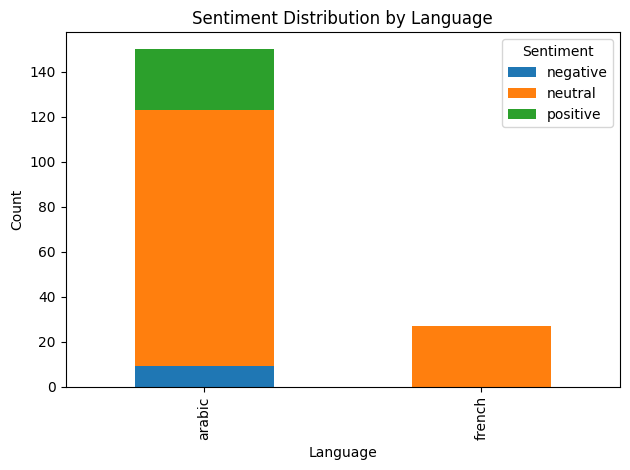

In [169]:
import matplotlib.pyplot as plt

# Create sentiment distribution plot by language
plt.figure(figsize=(12, 6))
sentiment_by_language = pd.crosstab(df_cleaned['language'], df_cleaned['sentiment'])
sentiment_by_language.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [170]:
# Save to CSV
df.to_csv(r'C:\Users\user\OneDrive\Desktop\projects\inovpost\ff\analyzed_multilingual_comments.csv', index=False)
print("Data saved to 'analyzed_multilingual_comments.csv'")

Data saved to 'analyzed_multilingual_comments.csv'
